For logistic with AUC only

In [25]:
import pickle
import numpy as np
import math
import matplotlib.pyplot as plt
import os

In [26]:
Model = 'logistic'
Index = 1
n = 2000
sig = 0.1
Xdist = "uniform"
randomBeta = "True"
#pp = 0.1

In [27]:
kNum = 5
nrep = 100
statType = "AUC"
ppList = [0.1, 0.2, 0.3, 0.4]

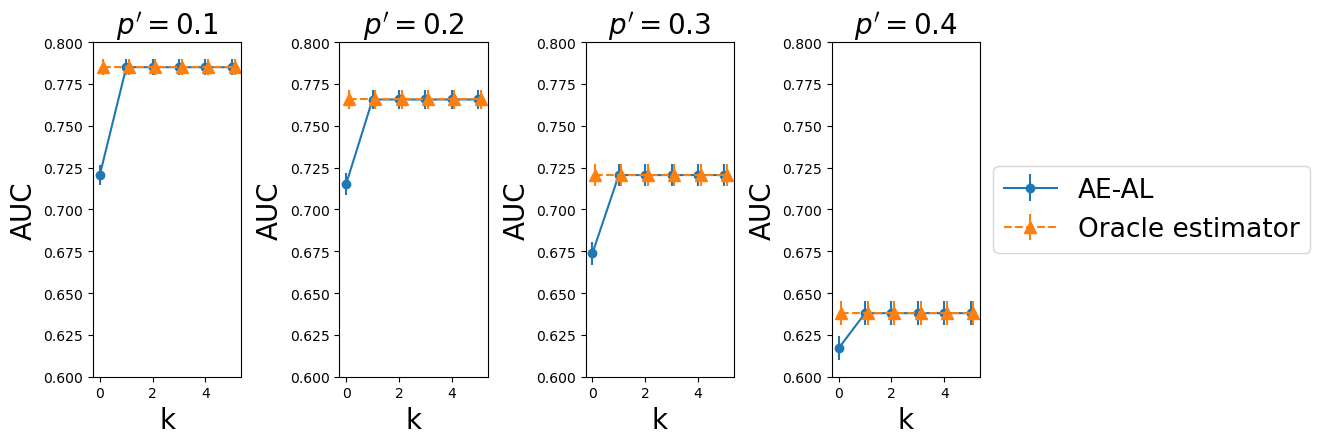

In [45]:
# number of plots
NumPlots = len(ppList)
niterList = np.array(range(kNum + 1))
#==========================Setting 1================================
fit, axes = plt.subplots(1,NumPlots, figsize = (12, 5))
fit.set_size_inches(14, 5)   
#fit.suptitle( 'Setting ' + str(Index) + ', AR(1) ' + r'$\rho=' + str(sig) + '$', fontsize=20)  
#fit.suptitle( 'Setting ' + str(Index), fontsize=20) 
#nList = ['n=300', 'n=2000']
for i in range(NumPlots):
    pp = ppList[i]

    #axe = axes[i]
    if NumPlots == 1:
        axe = axes
    else:
        axe = axes[i]

    #============================================================================
    # read the assisted learning data
    fname = Model + "_Setting_" + str(Index) + "_n_" + str(n) +  "_sig_" + str(sig) + "_Xdist_" + Xdist +  "_randomBeta_" + randomBeta + "_pp_" + str(pp)
    infile = open("./logistic_results/results/data/" + fname +  "_dic.p", 'rb')
    new_dict = pickle.load(infile)
    infile.close()
    AEAL_AUC = new_dict["AUC"]
    oracle_AUC = new_dict["AUC_oracle"]
    #============================================================================


    AEAL_AUC_mean = np.mean(AEAL_AUC, axis = 0)[0:(kNum + 1)]
    AEAL_AUC_ste = np.std(AEAL_AUC, axis = 0)[0:(kNum + 1)]/math.sqrt(nrep)
    #AEAL_AUC_ste = np.std(AEAL_AUC, axis = 0)

    
    oracle_AUC_mean = np.repeat(np.mean(oracle_AUC), (kNum + 1) )
    oracle_AUC_ste = np.repeat(np.std(oracle_AUC), (kNum + 1) )/math.sqrt(nrep)
    #oracle_AUC_ste = np.repeat(np.std(oracle_AUC), (kNum + 1) )

    
    
    axe.errorbar((niterList), AEAL_AUC_mean , AEAL_AUC_ste, marker = 'o')
    axe.errorbar((niterList + 0.1), oracle_AUC_mean , oracle_AUC_ste, marker = "^", linestyle = '--', markersize=8)

    #axe.set_xlabel("Number of transmission rounds", fontsize=20)
    axe.set_xlabel(r'k', fontsize=20)

    if statType == "AUC":
        axe.set_ylabel("AUC", fontsize=20)
    elif statType == "ll":
        axe.set_ylabel("Log-likelihood", fontsize=20)
    axe.set_title(r'$p^\prime=' + str(pp) + '$', fontsize=20)
    axe.set_ylim(0.6,0.8)
    
    if i==(NumPlots - 1):
        axe.legend(['AE-AL', 'Oracle estimator'], prop={'size': 19}, loc='center left', bbox_to_anchor=(1, 0.5))
    elif i<(NumPlots - 1):
        axe.legend('',frameon=False)
plt.tight_layout(rect=[0.05, 0.04, 1, 0.95])

#===========================create folder to store output results=====================
results_path_data = "./Result_Figure"
# Check whether the specified path exists or not
isExist = os.path.exists(results_path_data)

if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(results_path_data)

fname = Model + "_Setting_" + str(Index) + "_n_" + str(n) +  "_sig_" + str(sig) + "_Xdist_" + str(Xdist) +  "_randomBeta_" + randomBeta

plt.savefig('Result_Figure/MaskingY_results.pdf')